In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras import optimizers
from keras.layers import Activation, Dense, Dropout
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, _, y_train, _ = train_test_split(x_train, y_train, stratify=y_train, train_size=1/6)

In [3]:
def format(x):
    x = x.reshape(x.shape[0], 784)
    x = x.astype('float32')
    x =(x - np.mean(x))/(255 * np.std(x))
    return x

In [4]:
x_train = format(x_train)
x_test = format(x_test)

In [5]:
def add_noise(y):
    num_tup = (0,1,2,3,4,5,6,7,8,9)
    random_indices = np.random.choice(4000, size=4000, replace=False)
    # random_indices = np.random.choice(24000, size=24000, replace=False)
    for r_ind in random_indices:
        nl = list(num_tup)
        nl.remove(y[r_ind])
        y[r_ind] = np.random.choice(nl)
    return y

In [6]:
y_noise = add_noise(y_train)


In [7]:
print(x_train.shape,y_train.shape,x_test.shape, y_test.shape, y_noise.shape)

(10000, 784) (10000,) (10000, 784) (10000,) (10000,)


In [8]:
K = [1, 3, 5, 10, 15, 25, 40] 
P=[0,0.1,0.5]

In [9]:
def plot_(train_y, test_y, title, p=1):
    if p==0:
        plt.plot(K, train_y[0], marker='o',label = "train")
        plt.plot(K, test_y[0], marker='s', label = "test")
        plt.title(title)
        plt.legend()
        return
    plt.plot(K, train_y[0], marker='o',label = "p = 0")
    plt.plot(K, train_y[1], marker='o', label = "p = 0.1")
    plt.plot(K, train_y[2], marker='o', label = "p = 0.5")
    plt.title(title)
    plt.legend()

def classifier_model(x_tr, y_tr, x_te, y_te, batch_size):
    
    y_tr = to_categorical(y_tr,10)
    y_te = to_categorical(y_te, 10)
    train_accu_lst, test_accu_lst = [], []
    for p in P:
        k_train_acc, k_test_accu = [], []
        for k in K:
            model = Sequential()
            model.add(Dense(k, input_shape=(784,), kernel_initializer='he_normal'))
            model.add(Activation('relu'))
            model.add(Dropout(p))
            model.add(Dense(10))
            model.add(Activation('softmax'))

            model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizers.Adam(), metrics=['accuracy'])
            model.fit(x_tr, y_tr, batch_size=batch_size, epochs=80, verbose=0, validation_data=(x_te, y_te))
            
            _,k_tr = model.evaluate(x_tr, y_tr, verbose=0)
            _,k_te = model.evaluate(x_te, y_te, verbose=0)
            k_train_acc.append(k_tr)
            k_test_accu.append(k_te)
            print('********************* p = ', p, ' k = ', k, 'Training accu', k_tr, '*********************')
            print('********************* p = ', p, ' k = ', k, 'Testing  accu', k_te, '*********************')
        train_accu_lst.append(k_train_acc)
        test_accu_lst.append(k_test_accu)
        print("train _lst", train_accu_lst)
        print("test _lst", test_accu_lst)

    return train_accu_lst, test_accu_lst


In [10]:
train_accu, test_accu = classifier_model(x_train, y_train, x_test, y_test, batch_size=256)


********************* p =  0  k =  1 Training accu 0.18559999763965607 *********************
********************* p =  0  k =  1 Testing  accu 0.2549000084400177 *********************
********************* p =  0  k =  3 Training accu 0.3849000036716461 *********************
********************* p =  0  k =  3 Testing  accu 0.6158000230789185 *********************
********************* p =  0  k =  5 Training accu 0.45750001072883606 *********************
********************* p =  0  k =  5 Testing  accu 0.7422999739646912 *********************
********************* p =  0  k =  10 Training accu 0.5228999853134155 *********************
********************* p =  0  k =  10 Testing  accu 0.8539000153541565 *********************
********************* p =  0  k =  15 Training accu 0.531499981880188 *********************
********************* p =  0  k =  15 Testing  accu 0.867900013923645 *********************
********************* p =  0  k =  25 Training accu 0.5353000164031982 *****

In [11]:
print(train_accu, test_accu)

[[0.18559999763965607, 0.3849000036716461, 0.45750001072883606, 0.5228999853134155, 0.531499981880188, 0.5353000164031982, 0.545199990272522], [0.10849999636411667, 0.2849999964237213, 0.39969998598098755, 0.5162000060081482, 0.5364000201225281, 0.5411999821662903, 0.5457000136375427], [0.17839999496936798, 0.3303000032901764, 0.4341000020503998, 0.5012999773025513, 0.5236999988555908, 0.531499981880188, 0.5389000177383423]] [[0.2549000084400177, 0.6158000230789185, 0.7422999739646912, 0.8539000153541565, 0.867900013923645, 0.878600001335144, 0.8912000060081482], [0.11349999904632568, 0.43970000743865967, 0.6384000182151794, 0.8406999707221985, 0.8743000030517578, 0.883899986743927, 0.8902000188827515], [0.2378000020980835, 0.5072000026702881, 0.6969000101089478, 0.819100022315979, 0.853600025177002, 0.8687999844551086, 0.8784000277519226]]


Plots for data without noise

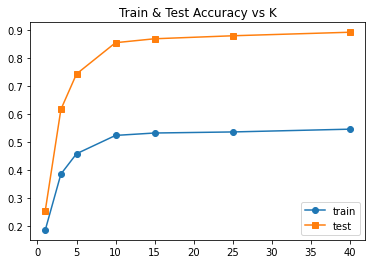

In [12]:
plot_(train_accu, test_accu, 'Train & Test Accuracy vs K', 0)


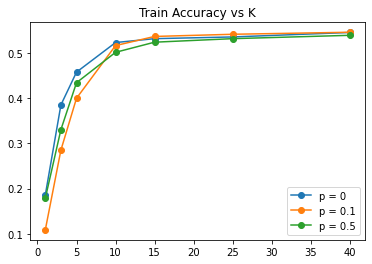

In [13]:
plot_(train_accu, [], 'Train Accuracy vs K')

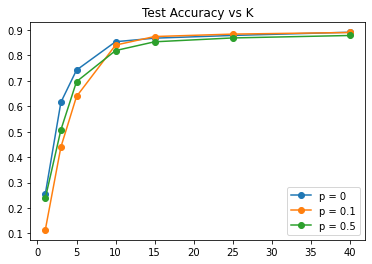

In [14]:
plot_(test_accu, [], 'Test Accuracy vs K')

Run for repeating with data with noise

In [15]:

train_accu, test_accu = classifier_model(x_train, y_noise, x_test, y_test, batch_size=256)

********************* p =  0  k =  1 Training accu 0.19519999623298645 *********************
********************* p =  0  k =  1 Testing  accu 0.2721000015735626 *********************
********************* p =  0  k =  3 Training accu 0.3472000062465668 *********************
********************* p =  0  k =  3 Testing  accu 0.5468999743461609 *********************
********************* p =  0  k =  5 Training accu 0.49230000376701355 *********************
********************* p =  0  k =  5 Testing  accu 0.8008999824523926 *********************
********************* p =  0  k =  10 Training accu 0.5331000089645386 *********************
********************* p =  0  k =  10 Testing  accu 0.8690999746322632 *********************
********************* p =  0  k =  15 Training accu 0.5285000205039978 *********************
********************* p =  0  k =  15 Testing  accu 0.866599977016449 *********************
********************* p =  0  k =  25 Training accu 0.5378000140190125 ****

In [16]:
print(train_accu)
print(test_accu)

[[0.19519999623298645, 0.3472000062465668, 0.49230000376701355, 0.5331000089645386, 0.5285000205039978, 0.5378000140190125, 0.5443000197410583], [0.17550000548362732, 0.2874999940395355, 0.46209999918937683, 0.511900007724762, 0.5289999842643738, 0.5389000177383423, 0.5436999797821045], [0.19370000064373016, 0.335099995136261, 0.4251999855041504, 0.476500004529953, 0.5232999920845032, 0.5335000157356262, 0.5403000116348267]]
[[0.2721000015735626, 0.5468999743461609, 0.8008999824523926, 0.8690999746322632, 0.866599977016449, 0.8808000087738037, 0.8884999752044678], [0.23090000450611115, 0.427700012922287, 0.7501000165939331, 0.8317000269889832, 0.8651999831199646, 0.8831999897956848, 0.8877000212669373], [0.25929999351501465, 0.5080000162124634, 0.685699999332428, 0.7757999897003174, 0.8515999913215637, 0.8709999918937683, 0.8827000260353088]]


Plots for data with noise

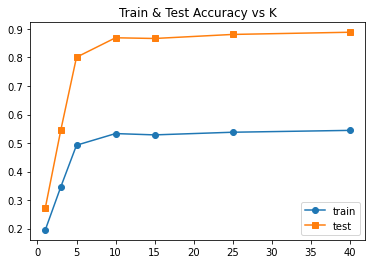

In [17]:
plot_(train_accu, test_accu, 'Train & Test Accuracy vs K', 0)


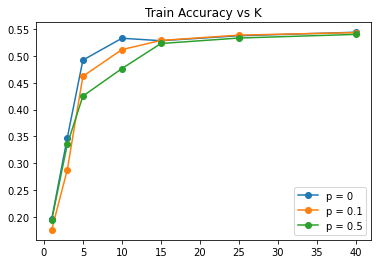

In [18]:
plot_(train_accu, [], 'Train Accuracy vs K')

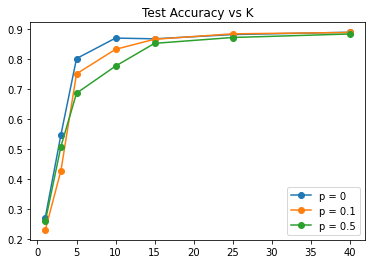

In [19]:
plot_(test_accu, [], 'Test Accuracy vs K')